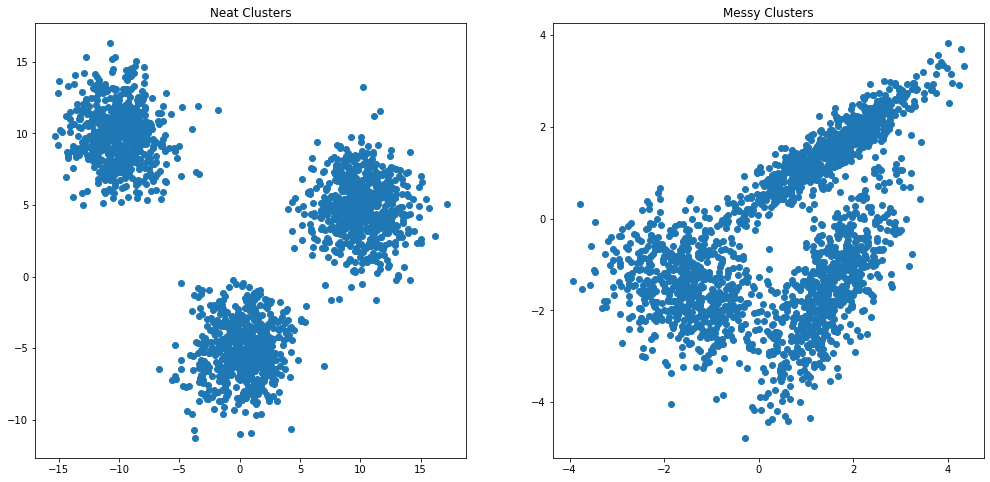

In [1]:
#import tools
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline

#Toy data sets

#neat spherical clusters
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=2000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

#messy spherical clusters
x_messy, _ = datasets.make_classification(n_samples=2000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)


plt.figure(figsize=(17,8))
plt.subplot(121, title='Neat Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='Messy Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])

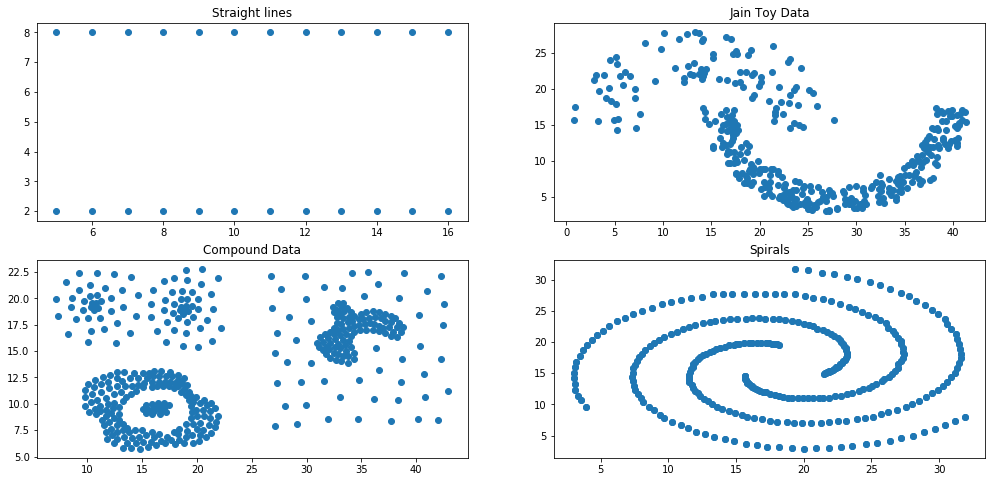

In [2]:
#load in straight lines data
lines_df = pd.read_csv('straight_lines.csv')
lines_x=lines_df.iloc[:,0]
lines_y=lines_df.iloc[:,1]
lines=np.column_stack((lines_x,lines_y))

#load in Jain's swirly data
jain_df = pd.read_csv('jains_toy.csv')
jain_x=jain_df.iloc[:,0]
jain_y=jain_df.iloc[:,1]
jain=np.column_stack((jain_x,jain_y))

#load in Zahn's compound data
compound_df = pd.read_csv('compound.csv')
compound_x=compound_df.iloc[:,0]
compound_y=compound_df.iloc[:,1]
compound=np.column_stack((compound_x,compound_y))

#load in spirals
spiral_df = pd.read_csv('spirals.csv')
spiral_x=spiral_df.iloc[:,0]
spiral_y=spiral_df.iloc[:,1]
spiral=np.column_stack((spiral_x,spiral_y))

#plot
plt.figure(figsize=(17,8))
plt.subplot(221, title='Straight lines')
plt.scatter(lines[:,0], lines[:,1])
plt.subplot(222, title='Jain Toy Data')
plt.scatter(jain[:,0], jain[:,1])
plt.subplot(223, title='Compound Data')
plt.scatter(compound[:,0], compound[:,1])
plt.subplot(224, title='Spirals')
plt.scatter(spiral[:,0], spiral[:,1])

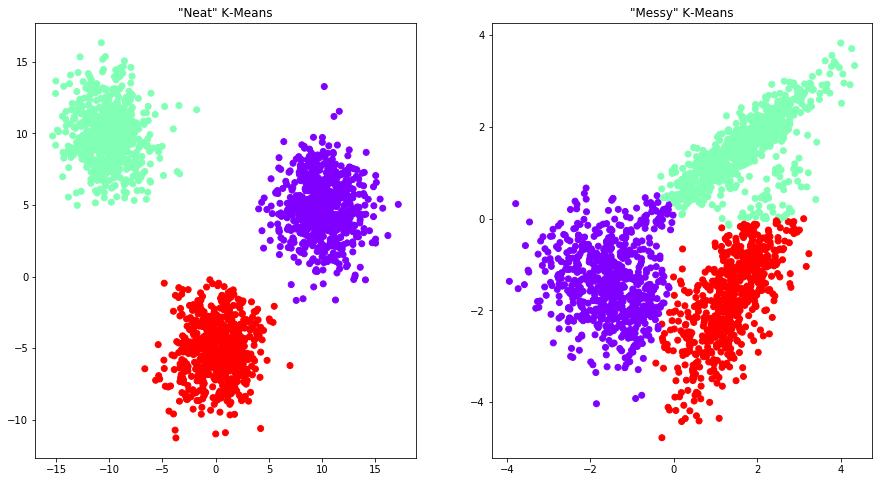

In [3]:
from sklearn.cluster import KMeans

km_neat = KMeans(n_clusters=3).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap='rainbow')
plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap='rainbow')

#where does kmeans work well, and where does it fail?

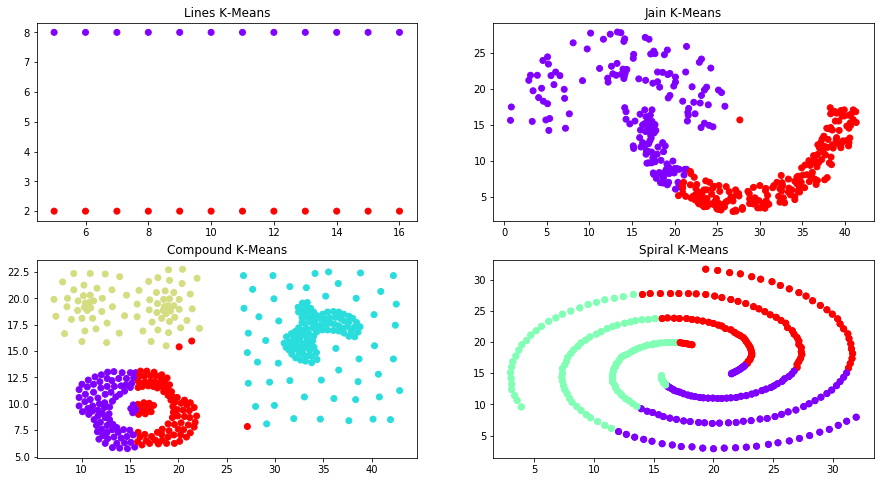

In [4]:

#k-means clustering with the number of clusters we want to see
km_lines = KMeans(n_clusters=2).fit_predict(lines)
km_jain = KMeans(n_clusters=2).fit_predict(jain)
km_compound = KMeans(n_clusters=4).fit_predict(compound)
km_spiral = KMeans(n_clusters=3).fit_predict(spiral)


plt.figure(figsize=(15,8))
plt.subplot(221, title='Lines K-Means')
plt.scatter(lines[:,0], lines[:,1], c=km_lines, cmap='rainbow')
plt.subplot(222, title='Jain K-Means')
plt.scatter(jain[:,0], jain[:,1], c=km_jain, cmap='rainbow')
plt.subplot(223, title='Compound K-Means')
plt.scatter(compound[:,0], compound[:,1], c=km_compound, cmap='rainbow')
plt.subplot(224, title='Spiral K-Means')
plt.scatter(spiral[:,0], spiral[:,1], c=km_spiral, cmap='rainbow')

In [5]:
#what if our k is not the BEST k?

#Elbow method!
nk = range(1,10) #generate list from 1 to 10 as number of clusters for elbow test
kmeans=[KMeans(n_clusters=i) for i in nk] #set up array of the K-means algorithm to test data over each number of clusters
neat_score=[kmeans[i].fit(x_neat).score(x_neat) for i in range(len(kmeans))] #Create array of scores for data for k-means algos
messy_score=[kmeans[i].fit(x_messy).score(x_messy) for i in range(len(kmeans))]
lines_score = [kmeans[i].fit(lines).score(lines) for i in range(len(kmeans))]
jain_score = [kmeans[i].fit(jain).score(jain) for i in range(len(kmeans))]
compound_score = [kmeans[i].fit(compound).score(compound) for i in range(len(kmeans))]
spiral_score = [kmeans[i].fit(spiral).score(spiral) for i in range(len(kmeans))]

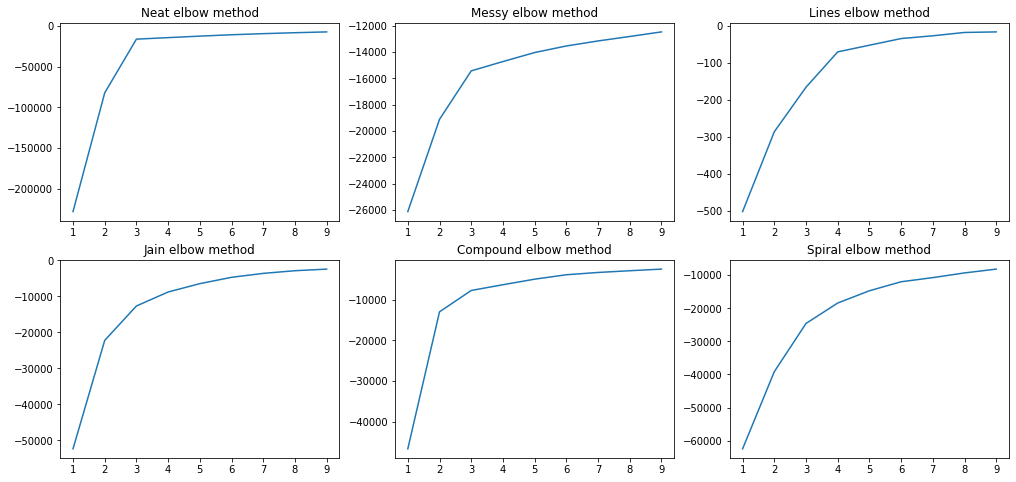

In [6]:
#plot scores versus cluster numbers

plt.figure(figsize=(17,8))
plt.subplot(231,title='Neat elbow method')
plt.plot(nk,neat_score)
plt.subplot(232,title='Messy elbow method')
plt.plot(nk,messy_score)
plt.subplot(233,title='Lines elbow method')
plt.plot(nk,lines_score)
plt.subplot(234,title='Jain elbow method')
plt.plot(nk,jain_score)
plt.subplot(235,title='Compound elbow method')
plt.plot(nk,compound_score)
plt.subplot(236,title='Spiral elbow method')
plt.plot(nk,spiral_score)


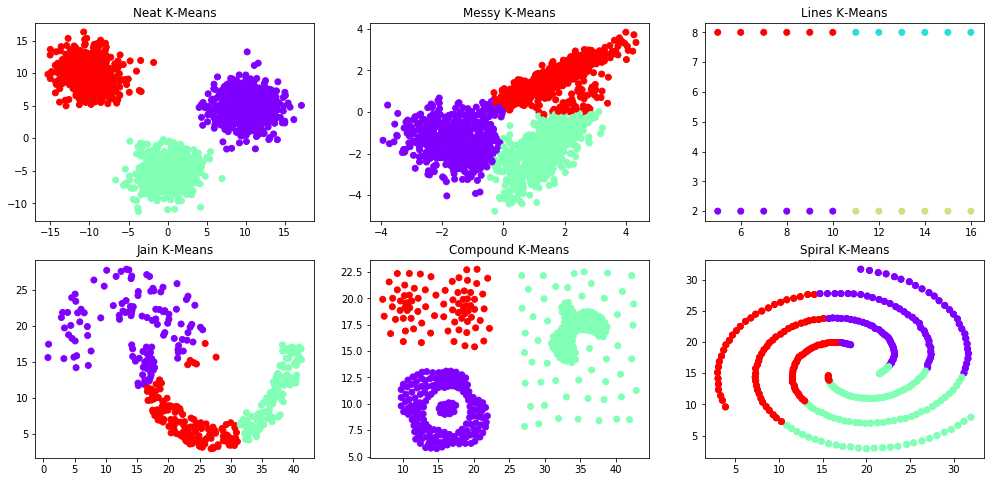

In [7]:
#k-means clustering with the number of clusters we found from elbow method
km_neat = KMeans(n_clusters=3).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3).fit_predict(x_messy)
km_lines = KMeans(n_clusters=4).fit_predict(lines)
km_jain = KMeans(n_clusters=3).fit_predict(jain)
km_compound = KMeans(n_clusters=3).fit_predict(compound)
km_spiral = KMeans(n_clusters=3).fit_predict(spiral)


plt.figure(figsize=(17,8))
plt.subplot(231, title='Neat K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap='rainbow')
plt.subplot(232, title='Messy K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap='rainbow')
plt.subplot(233, title='Lines K-Means')
plt.scatter(lines[:,0], lines[:,1], c=km_lines, cmap='rainbow')
plt.subplot(234, title='Jain K-Means')
plt.scatter(jain[:,0], jain[:,1], c=km_jain, cmap='rainbow')
plt.subplot(235, title='Compound K-Means')
plt.scatter(compound[:,0], compound[:,1], c=km_compound, cmap='rainbow')
plt.subplot(236, title='Spiral K-Means')
plt.scatter(spiral[:,0], spiral[:,1], c=km_spiral, cmap='rainbow')